## 분류
- 이진 분류와 다중 분류
- 알고리즘 : Logistic Regression, 경사 하강법, 결정 트리

In [2]:
# 출처 : https://www.sciencedirect.com/journal/data-in-brief
import pandas as pd

df = pd.read_csv('test2.csv')
print(df.shape)
df.head()

(40060, 31)


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,...,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,...,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,...,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,...,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0,0,0,0,0


#### Business Understanding
- 분야 : 숙박업 (호텔)
- 수익구조 or Business Logic : 예약을 받고 체크인 시점부터 체크아웃 시점까지 서비스를 제공하고 수익을 얻는 구조
- 수익을 극대화 하려면 수요량을 예측하고 예약의 취소 확률을 예측하여 초과 예약을 받는다.
- 유사한 분야는 식당, 비행기

#### Data Understanding

#### 경우의 수 column 처리
- Apply Domain Knowledge
- Frequency Encoding
- Target Encoding
- One-hot Encoding

#### Apply Domain Knowledge

In [6]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [4]:
set(df['Meal'])

# BB : Bed & Breakfast
# FB ; Full board (breakfast, lunch and dinner)
# HB : Half board (breakfast and one other meal – usually dinner)
# Undefined/SC : no meal package

{'BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'}

In [5]:
mapper = {'SC       ':0,
          'Undefined':0,
          'BB       ':1,
          'HB       ':2,
          'FB       ':3}

df['day_stay'] = df['Meal'].map(mapper)

In [6]:
df[ ['Meal', 'day_stay'] ]

,Meal,day_stay
0,BB,1
1,BB,1
2,BB,1
3,BB,1
4,BB,1
...,...,...
40055,BB,1
40056,BB,1
40057,BB,1
40058,HB,2


In [7]:
set(df['day_stay'])

{0, 1, 2, 3}

In [8]:
len(set(df['Country']))

126

In [9]:
df['Foreigner'] = 1
df.loc[df['Country'] == 'PRT', 'Foreigner'] = 0

In [10]:
set(df['Foreigner'])

{0, 1}

In [11]:
df[ ['Foreigner', 'Country'] ].head()

,Foreigner,Country
0,0,PRT
1,0,PRT
2,1,GBR
3,1,GBR
4,1,GBR


#### Frequency Encoding

In [12]:
df['Country'].value_counts()

PRT    17630
GBR     6814
ESP     3957
IRL     2166
FRA     1611
       ...  
BIH        1
MUS        1
COM        1
UGA        1
DJI        1
Name: Country, Length: 125, dtype: int64

In [13]:
df['Country'].value_counts(normalize=True)

PRT    0.445247
GBR    0.172088
ESP    0.099934
IRL    0.054702
FRA    0.040686
         ...   
BIH    0.000025
MUS    0.000025
COM    0.000025
UGA    0.000025
DJI    0.000025
Name: Country, Length: 125, dtype: float64

In [14]:
cr = pd.DataFrame(df['Country'].value_counts(normalize=True)).reset_index()
cr.columns = ['Country', 'Country_Ratio']
cr.head()

,Country,Country_Ratio
0,PRT,0.445247
1,GBR,0.172088
2,ESP,0.099934
3,IRL,0.054702
4,FRA,0.040686


In [15]:
df = pd.merge(df, cr)
df.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,1
LeadTime,342,737,0,9,85
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,2,2,3
Adults,2,2,2,2,2
Children,0,0,0,0,0


#### Target Encoding
- 데이터에 선입견, 고정관념이 들어갈 수 있음
- 과적합 Overfitting 될 수 있음
- 크게 주로 고려되지 않음

In [16]:
import numpy as np

In [17]:
df.groupby('Country').agg({'IsCanceled':np.mean}).reset_index()

,Country,IsCanceled
0,AGO,0.291667
1,ALB,0.333333
2,AND,0.600000
3,ARE,0.727273
4,ARG,0.157895
...,...,...
120,VEN,0.333333
121,VNM,0.000000
122,ZAF,0.277778
123,ZMB,0.000000


In [18]:
df.groupby('Country').agg({'IsCanceled':np.mean}).reset_index().sort_values(by='IsCanceled')

# 빈도수가 낮은 경우의 수는 고정관념, 선입견이 발생할 수 있음 -> 과적합
# 빈도수가 높은 일반화의 경우에는 필요에 따라 고정관념, 선입견이 필요함

,Country,IsCanceled
62,JOR,0.0
86,NPL,0.0
82,MYS,0.0
81,MWI,0.0
80,MUS,0.0
...,...,...
12,BHR,1.0
61,JEY,1.0
100,SEN,1.0
43,FJI,1.0


#### One-hot Encoding (중요!)

In [19]:
set(df['Meal'])

{'BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'}

In [20]:
pd.get_dummies(df['Meal'])

# 다중 공선성 : feature 들의 상관관계가 높아 오히러 부정적인 영향을 주는 것

,BB,FB,HB,SC,Undefined
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
39591,1,0,0,0,0
39592,1,0,0,0,0
39593,1,0,0,0,0
39594,1,0,0,0,0


In [21]:
sum(cr[:5]['Country_Ratio'])

0.8126578442266895

In [22]:
sum(cr[-100:]['Country_Ratio'])

0.020507121931508172

In [25]:
cr[:5]['Country'].values

array(['PRT', 'GBR', 'ESP', 'IRL', 'FRA'], dtype=object)

In [26]:
top_5 = cr[:5]['Country'].values

In [27]:
def country_hot(country):
    if (country in top_5):
        return country
    else:
        return 'other'

In [28]:
country_hot('KOR')

'other'

In [30]:
df['Country_Simple'] = df['Country'].apply(lambda x : country_hot(x))
set(df['Country_Simple'])

{'ESP', 'FRA', 'GBR', 'IRL', 'PRT', 'other'}

In [31]:
pd.get_dummies(df['Country_Simple'])

,ESP,FRA,GBR,IRL,PRT,other
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
39591,0,0,0,0,0,1
39592,0,0,0,0,0,1
39593,0,0,0,0,0,1
39594,0,0,0,0,0,1


In [32]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'Foreigner', 'Country_Ratio', 'Country_Simple'],
      dtype='object')

In [33]:
# 차를 가져오는 경우와 그렇지 않은 경우를 car_yes로 간단히 표현

df['car_yes'] = 0
df.loc[df['RequiredCarParkingSpaces'] > 0, 'car_yes'] = 1

set(df['car_yes'])

{0, 1}

In [35]:
# 고객이 예약한 객실과 배정된 객실이 다를 때에 관한 정보를 추가

set(df['ReservedRoomType'])

{'A               ',
 'B               ',
 'C               ',
 'D               ',
 'E               ',
 'F               ',
 'G               ',
 'H               ',
 'L               '}

In [36]:
set(df['AssignedRoomType'])

{'A               ',
 'B               ',
 'C               ',
 'D               ',
 'E               ',
 'F               ',
 'G               ',
 'H               ',
 'I               ',
 'L               '}

In [37]:
df['ReservedRoomType'] = df['ReservedRoomType'].apply(lambda x : x[:1])
df['AssignedRoomType'] = df['AssignedRoomType'].apply(lambda x : x[:1])

In [38]:
set(df['ReservedRoomType'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L'}

In [39]:
set(df['AssignedRoomType'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'L'}

In [42]:
df['RA'] = df['ReservedRoomType'] + df['AssignedRoomType']
df['RA']

0        CC
1        CC
2        CC
3        CC
4        AA
         ..
39591    DD
39592    DD
39593    EE
39594    DD
39595    GG
Name: RA, Length: 39596, dtype: object

In [44]:
df['RA_Changed'] = df['RA'].apply(lambda x : 0 if (x[0] == x[1]) else 1)
df['RA_Changed']

0        0
1        0
2        0
3        0
4        0
        ..
39591    0
39592    0
39593    0
39594    0
39595    0
Name: RA_Changed, Length: 39596, dtype: int64

In [45]:
np.mean(df['RA_Changed'])

0.18958985756136984

In [46]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'Foreigner', 'Country_Ratio', 'Country_Simple', 'car_yes',
       'RA', 'RA_Changed'],
      dtype='object')

In [47]:
interested = ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'Foreigner', 'Country_Ratio', 'Country_Simple', 'car_yes',
       'RA', 'RA_Changed']

df[interested].to_csv('test2_modify.csv', index=False)

In [48]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,...,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,day_stay,Foreigner,Country_Ratio,car_yes,RA_Changed
count,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,...,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000,39596.000000
mean,0.279750,93.438857,2016.123851,27.152515,15.827028,1.196383,3.141529,1.872942,0.129862,0.013966,...,0.288767,0.533943,95.347555,0.137009,0.621048,1.209062,0.554753,0.244817,0.135973,0.189590
std,0.448882,97.387321,0.722846,13.967053,8.881599,1.142050,2.445976,0.697112,0.447192,0.119061,...,0.728443,7.471759,61.495116,0.349976,0.813648,0.516171,0.496999,0.186289,0.342765,0.391981
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000025,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,50.500000,0.000000,0.000000,1.000000,0.000000,0.054702,0.000000,0.000000
50%,0.000000,59.000000,2016.000000,28.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,76.000000,0.000000,0.000000,1.000000,1.000000,0.172088,0.000000,0.000000
75%,1.000000,155.000000,2017.000000,38.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,125.617500,0.000000,1.000000,1.000000,1.000000,0.445247,0.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,...,17.000000,185.000000,508.000000,8.000000,5.000000,3.000000,1.000000,0.445247,1.000000,1.000000


In [49]:
df.describe().columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'day_stay',
       'Foreigner', 'Country_Ratio', 'car_yes', 'RA_Changed'],
      dtype='object')

In [53]:
label = 'IsCanceled'
features = ['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'TotalOfSpecialRequests', 'day_stay',
       'Foreigner', 'Country_Ratio', 'car_yes', 'RA_Changed']

In [54]:
# feature selection - filter, wrapper, embed

X, Y = df[features], df[label]

In [56]:
df.groupby('LeadTime').agg({label : np.mean}).reset_index()

,LeadTime,IsCanceled
0,0,0.048366
1,1,0.056172
2,2,0.092920
3,3,0.079487
4,4,0.063566
...,...,...
407,471,1.000000
408,532,0.000000
409,542,0.000000
410,709,0.000000


In [57]:
import seaborn as sns

In [58]:
tgt = df.groupby('LeadTime').agg({label : np.mean}).reset_index()

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

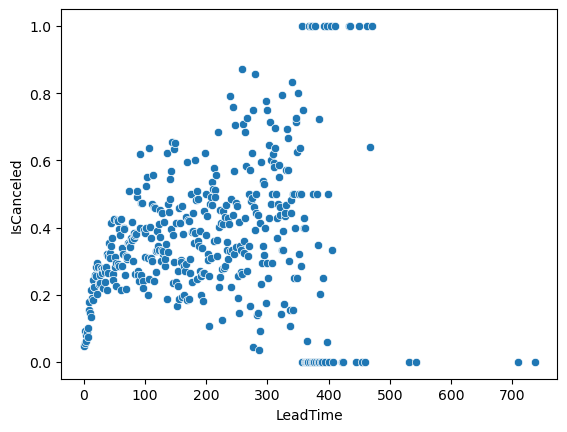

In [59]:
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

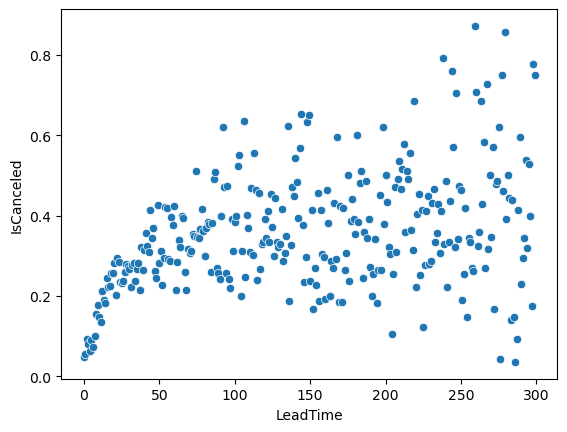

In [63]:
tgt = df.groupby('LeadTime').agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['LeadTime'] < 300]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

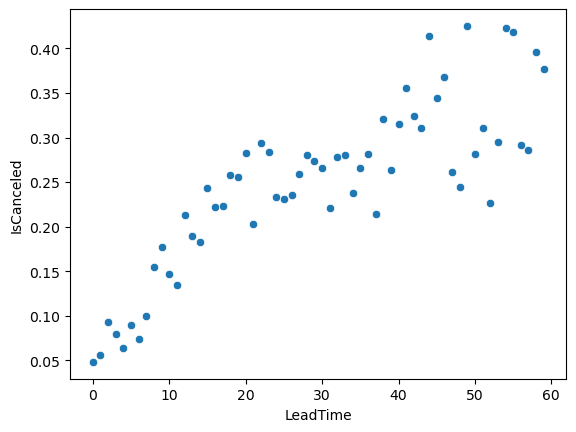

In [64]:
tgt = df.groupby('LeadTime').agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['LeadTime'] < 60]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

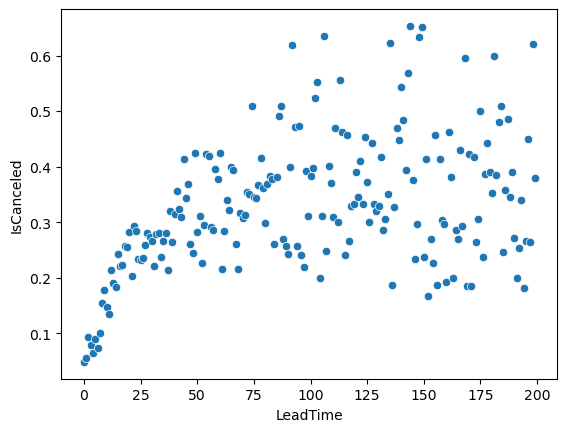

In [65]:
tgt = df.groupby('LeadTime').agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['LeadTime'] < 200]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

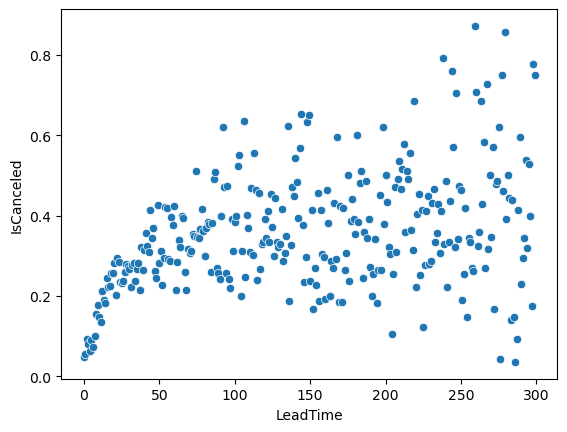

In [66]:
tgt = df.groupby('LeadTime').agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['LeadTime'] < 300]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled')

# LeadTime이 적은 구간에서는 선형성을 지니긴함
# 하지만 LeadTime이 증가되면 증가될수록 크게 의미가 없음

In [68]:
df.groupby(['LeadTime', 'Foreigner']).agg({label : np.mean})

IsCanceled
LeadTime Foreigner            
0        0            0.065923
         1            0.018261
1        0            0.075975
         1            0.021544
2        0            0.114530
...                        ...
471      0            1.000000
532      1            0.000000
542      1            0.000000
709      1            0.000000
737      0            0.000000

[786 rows x 1 columns]

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

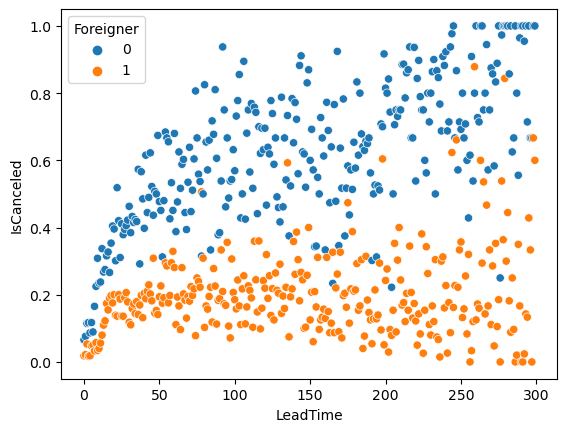

In [69]:
tgt = df.groupby(['LeadTime', 'Foreigner']).agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['LeadTime'] < 300]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled', hue='Foreigner')

# 외국인이 내국인 보다 취소율이 낮음

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

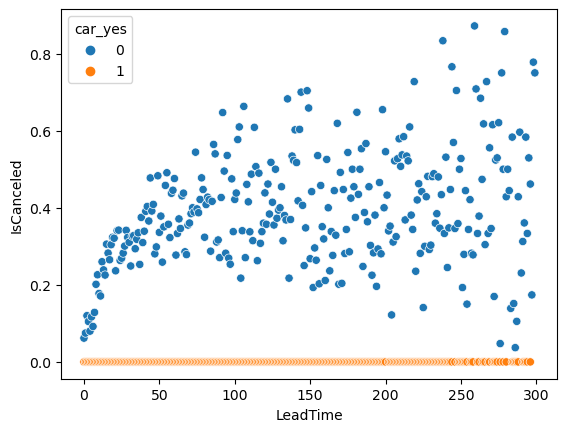

In [70]:
tgt = df.groupby(['LeadTime', 'car_yes']).agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['LeadTime'] < 300]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled', hue='car_yes')

# 차를 가져오는 경우에는 취소율이 0이다

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

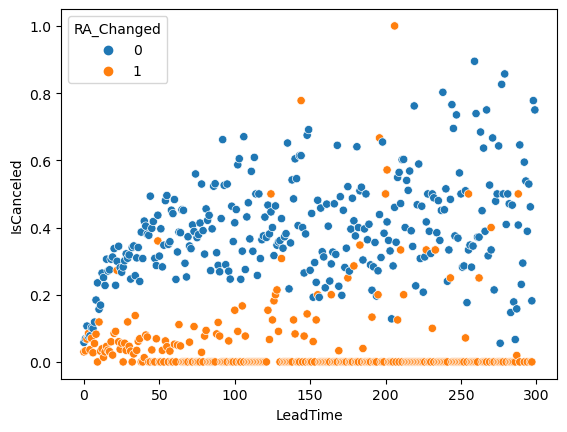

In [71]:
tgt = df.groupby(['LeadTime', 'RA_Changed']).agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['LeadTime'] < 300]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled', hue='RA_Changed')

# 예약한 방과 같은 방을 배정받은 사람은 그렇지 않은 사람보다 취소율이 현저하게 낮음

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

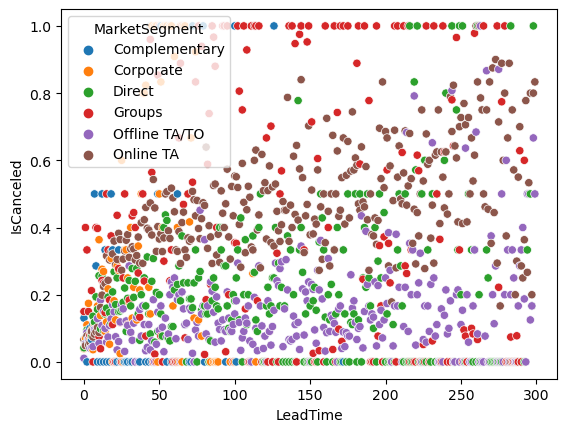

In [72]:
tgt = df.groupby(['LeadTime', 'MarketSegment']).agg({label : np.mean}).reset_index()
tgt = tgt.loc[tgt['LeadTime'] < 300]
sns.scatterplot(data=tgt, x='LeadTime', y='IsCanceled', hue='MarketSegment')

In [73]:
train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, Y_train = train[features], train[label]
X_test, Y_test = test[features], test[label]

In [74]:
from sklearn.tree import DecisionTreeClassifier as dt

In [75]:
model = dt()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [76]:
from sklearn.tree import export_graphviz as eg

In [77]:
eg(model, out_file='tree.txt', feature_names=features,
  class_names=['cancel_no', 'cancel_yes'])

In [78]:
model = dt(max_depth = 3)
model.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [80]:
eg(model, out_file='tree.txt', feature_names=features,
  class_names=['cancel_no', 'cancel_yes'])

#### 지니계수 (gini)
- yes_prob, no_prob
- A = yes_prob * (1 - yes_prob)
- B = no_prob * (1 - no_prob)
- A + B

In [81]:
size = 10983
yes_prob = 1826 / size
no_prob = 9157 / size

A = yes_prob * (1 - yes_prob)
B = no_prob * (1 - no_prob)
A + B

0.27723114320461273